## CS5691 PRML Assignment 1
**Team 1**  
**Team Members:**  
N Sowmya Manojna   BE17B007  
Thakkar Riya Anandbhai  PH17B010   
Chaithanya Krishna Moorthy  PH17B011   

In [1]:
# Install required Packages
# Uncomment if you are running for the firts time
# !pip install -r requirements.txt
# try:
#     !mkdir images
# except:
#     pass

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('science')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = (5,9)
plt.rcParams['figure.figsize'] = 8,6

from regression import PolynomialRegression
from gridsearch import GridSearch

In [3]:
df = pd.read_csv("../datasets/function1.csv", index_col=0)
df.sort_values(by=["x"], inplace=True)
df.head()

x          y
1731 -1.995370  20.924170
1328 -1.994300  20.697622
730  -1.989581  20.418372
13   -1.988462  20.505452
546  -1.988102  20.644535


For Sample Size of  10  - GridSearch Results:


degree  lambda  Train error  Validation error  Sum Error
14       6     0.0     0.044889          0.159636   0.204525
7        3     0.0     0.672882          1.001484   1.674366
15       6     0.5     0.708018          1.292034   2.000052
22       9     0.5     0.750020          1.469413   2.219433
16       6     1.0     0.978764          1.556590   2.535354
8        3     0.5     1.017522          1.649754   2.667276
2        2     1.0     1.169652          1.584834   2.754486
1        2     0.5     1.059525          1.711646   2.771171
3        2     2.0     1.471590          1.412142   2.883731
0        2     0.0     1.014199          1.883134   2.897333
23       9     1.0     1.040132          1.929033   2.969165
17       6     2.0     1.390322          1.712728   3.103050
9        3     1.0     1.375405          1.858616   3.234021
24       9     2.0     1.354363          2.165779   3.520142
10       3     2.0     1.851634          1.918302   3.769936
25       9    10.0     2.281929          1.857270   4.139198
18       6    10.0     2.797239          1.657453   4.454692
11       3    10.0     3.085788          1.446564   4.532352
4        2    10.0     3.474567          1.065662   4.540229
26       9    50.0     3.342110          1.447933   4.790042
27       9   100.0     3.782560          1.380623   5.163183
19       6    50.0     3.746184          1.431362   5.177546
20       6   100.0     3.939933          1.377351   5.317284
12       3    50.0     4.446303          1.192392   5.638695
13       3   100.0     5.249380          1.211820   6.461200
5        2    50.0     6.080079          1.109623   7.189702
6        2   100.0     6.788129          1.180800   7.968929
21       9     0.0     5.063475         92.085167  97.148642

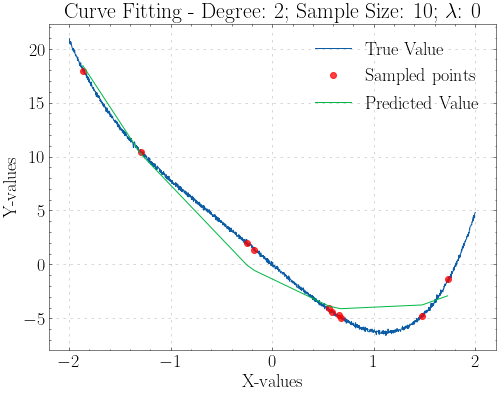

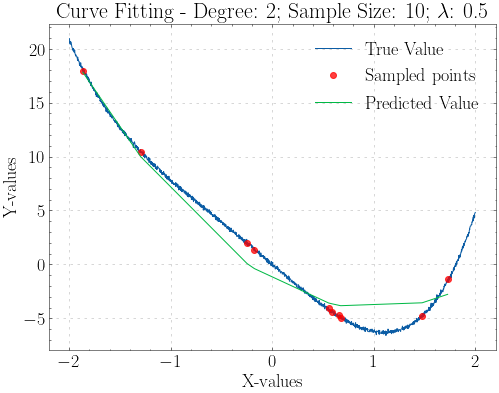

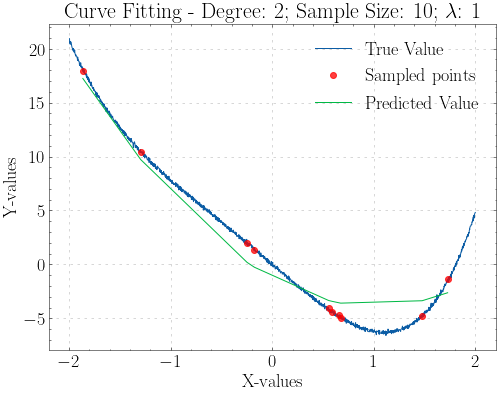

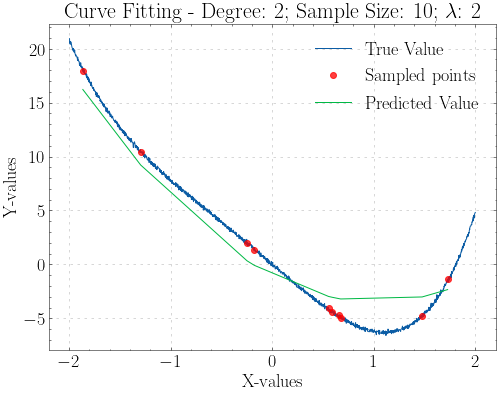

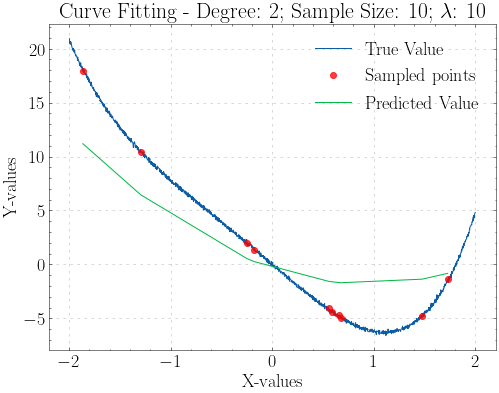

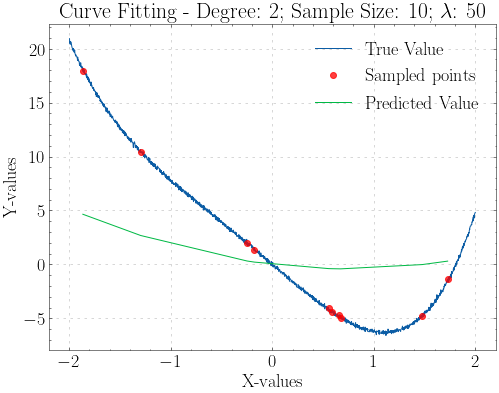

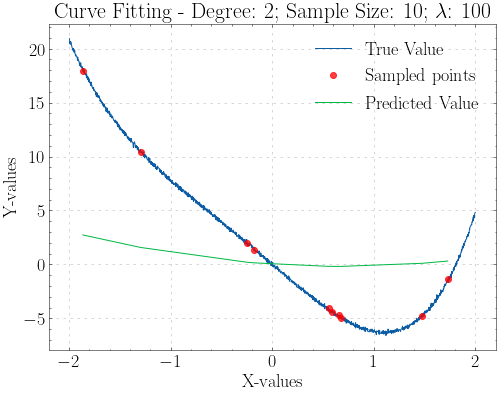

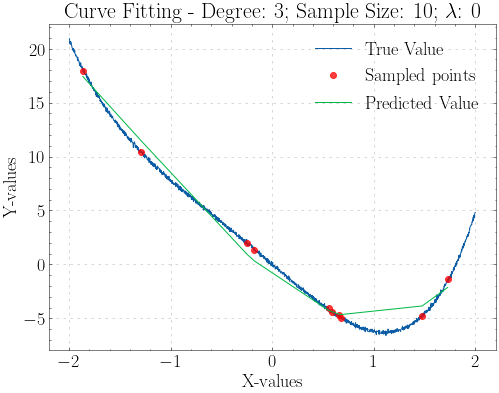

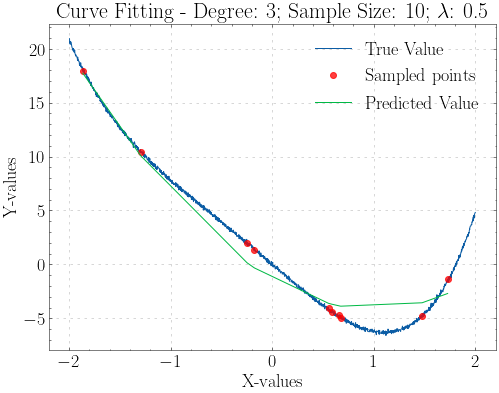

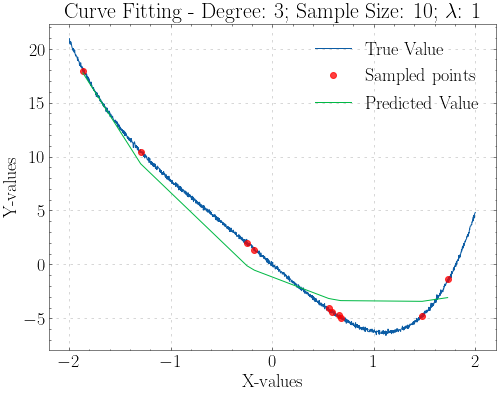

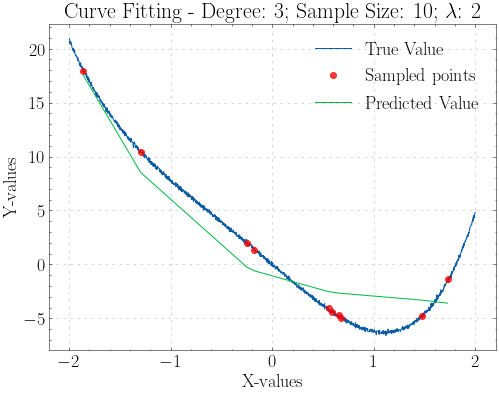

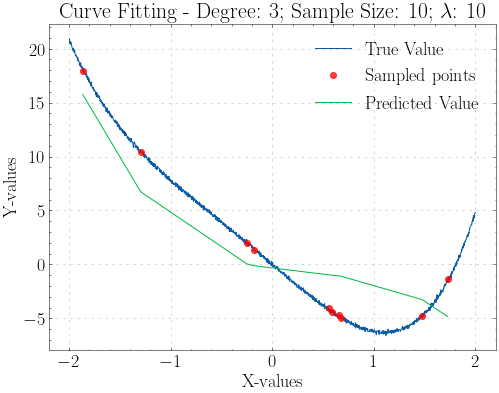

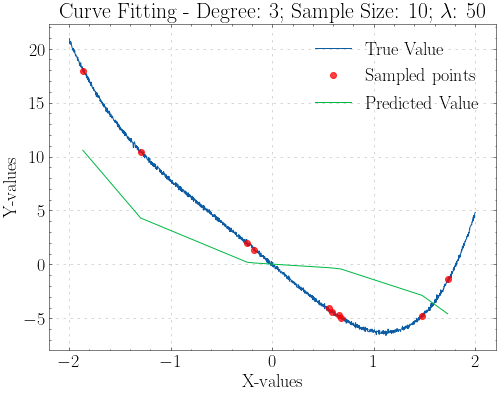

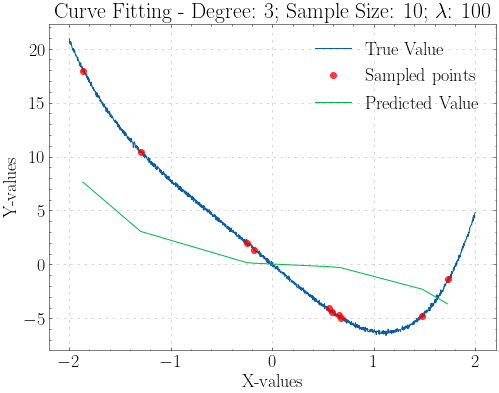

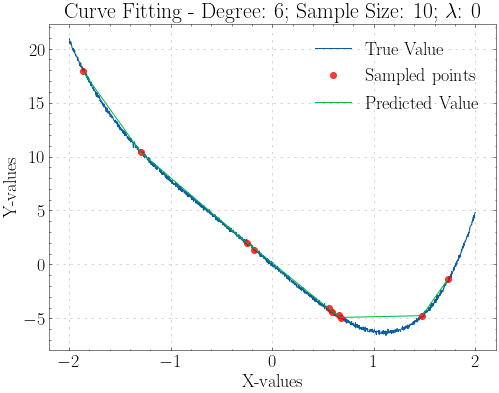

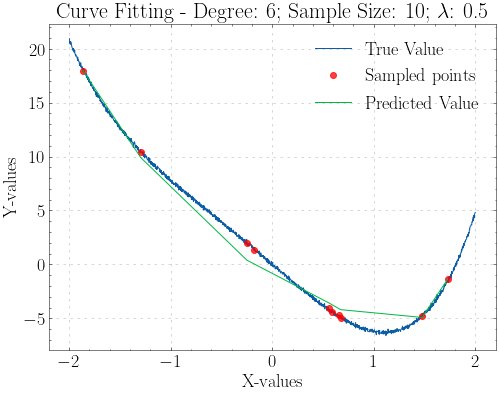

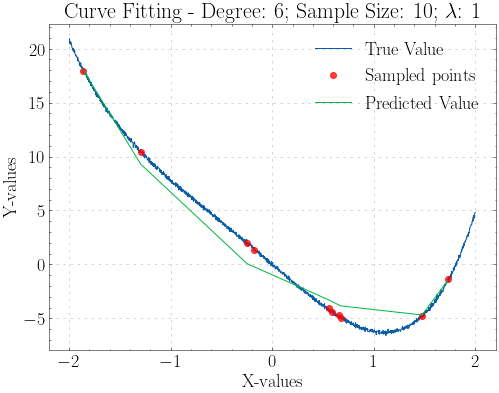

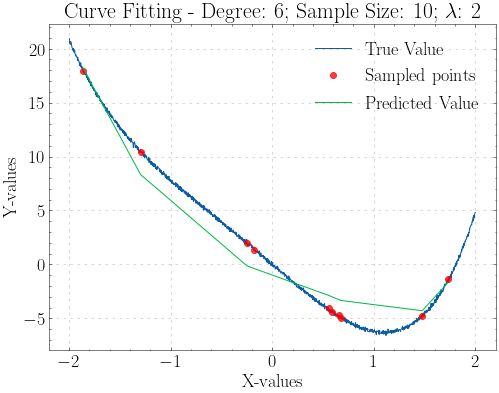

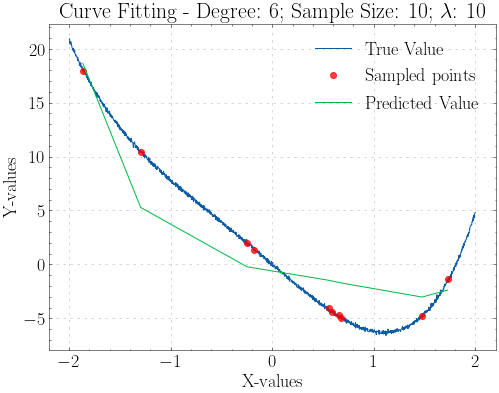

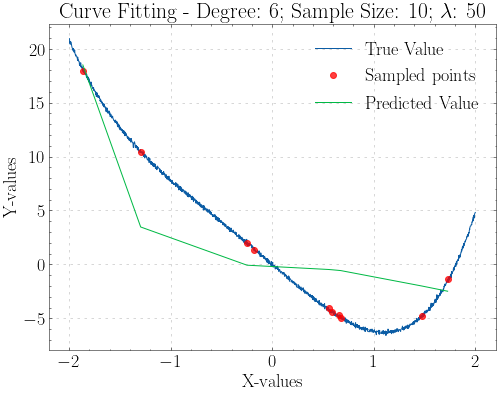

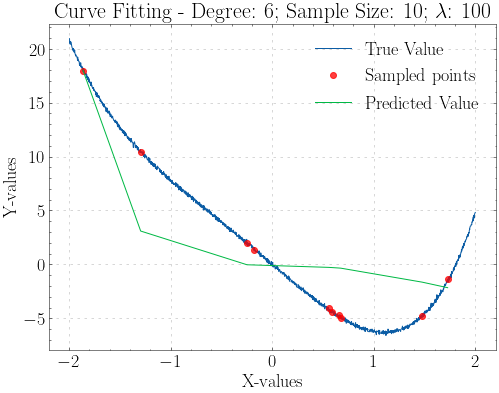

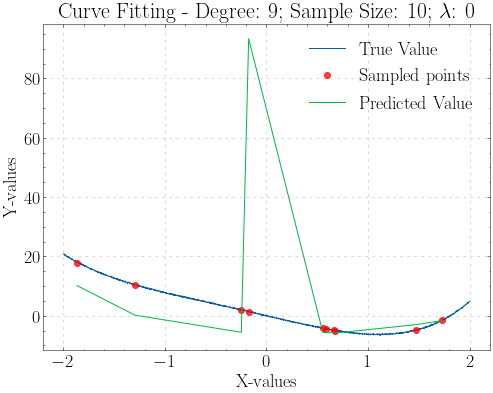

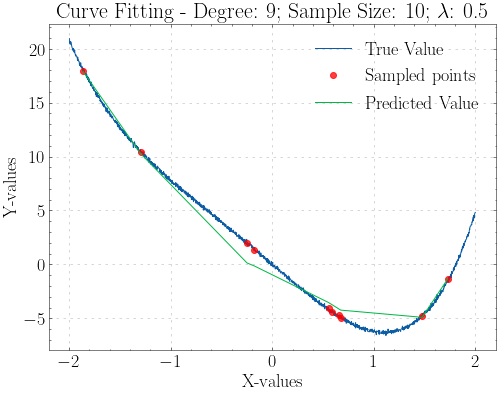

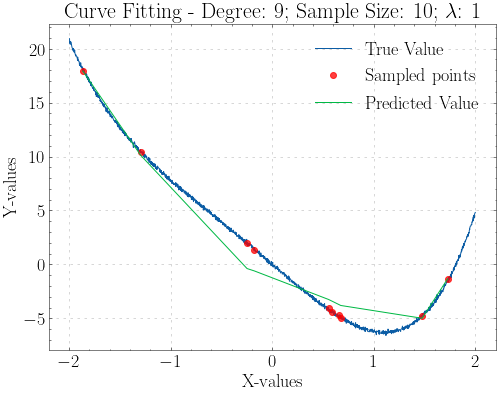

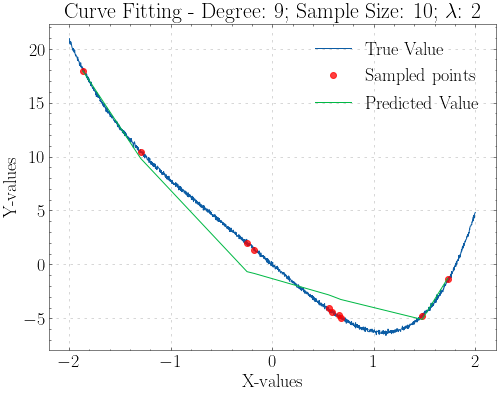

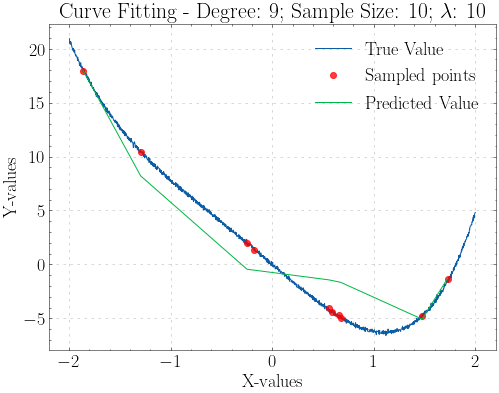

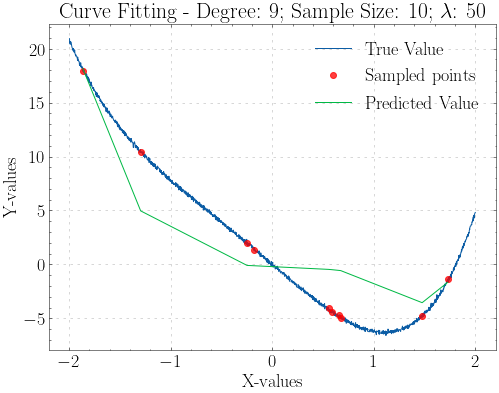

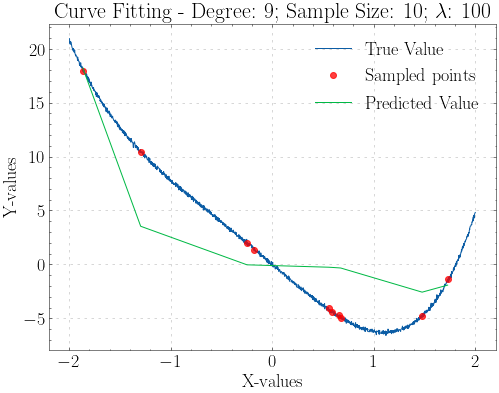


For Sample Size of  200  - GridSearch Results:


degree  lambda  Train error  Validation error  Sum Error
14       6     0.0     0.094536          0.094379   0.188914
21       9     0.0     0.093581          0.100752   0.194333
15       6     0.5     0.128136          0.144512   0.272648
22       9     0.5     0.134226          0.152565   0.286791
16       6     1.0     0.187428          0.203255   0.390684
23       9     1.0     0.186479          0.209008   0.395487
24       9     2.0     0.289107          0.311716   0.600824
17       6     2.0     0.302235          0.310699   0.612934
25       9    10.0     0.766298          0.776521   1.542819
18       6    10.0     0.787556          0.786211   1.573767
9        3     1.0     0.939789          0.843160   1.782948
8        3     0.5     0.935552          0.851141   1.786693
10       3     2.0     0.955492          0.836864   1.792356
7        3     0.0     0.934079          0.862605   1.796685
11       3    10.0     1.245737          1.053461   2.299198
1        2     0.5     1.591943          1.420648   3.012591
2        2     1.0     1.592243          1.420474   3.012717
0        2     0.0     1.591842          1.421021   3.012863
3        2     2.0     1.593419          1.420708   3.014127
4        2    10.0     1.626363          1.446713   3.073077
19       6    50.0     1.586311          1.708840   3.295151
26       9    50.0     1.620063          1.707757   3.327820
5        2    50.0     2.072812          1.882810   3.955622
27       9   100.0     2.138200          2.310223   4.448424
20       6   100.0     2.168534          2.377912   4.546446
12       3    50.0     2.379269          2.229847   4.609116
6        2   100.0     2.696613          2.519404   5.216017
13       3   100.0     2.947778          2.853756   5.801534

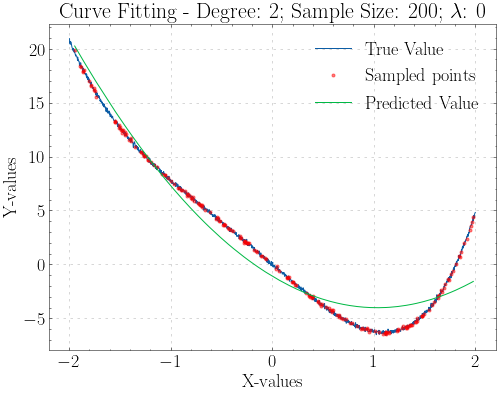

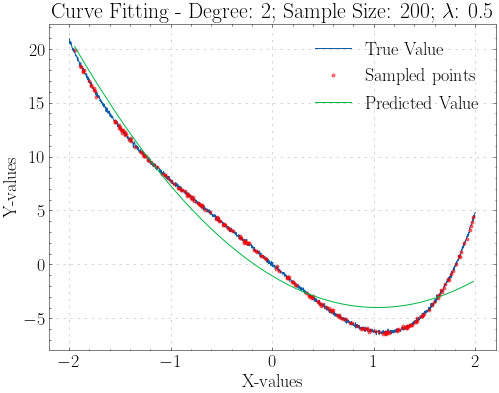

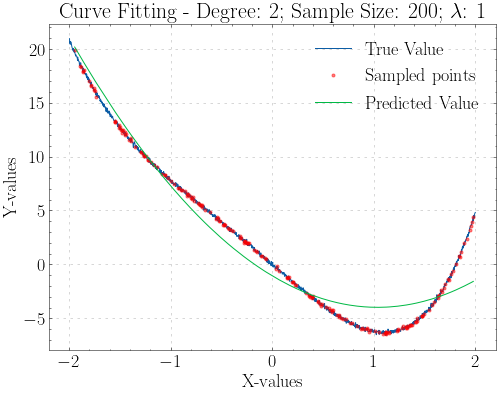

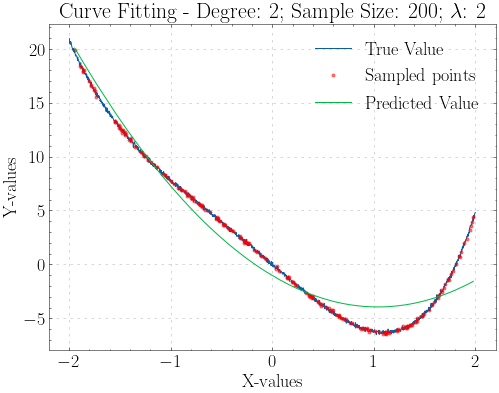

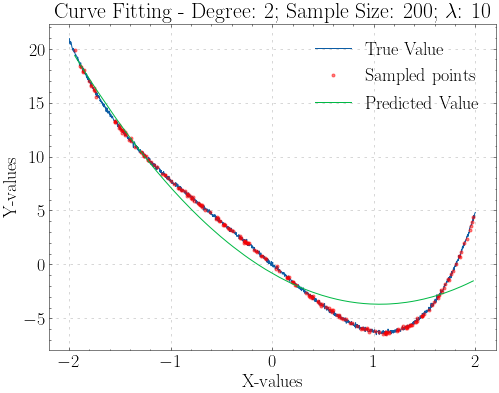

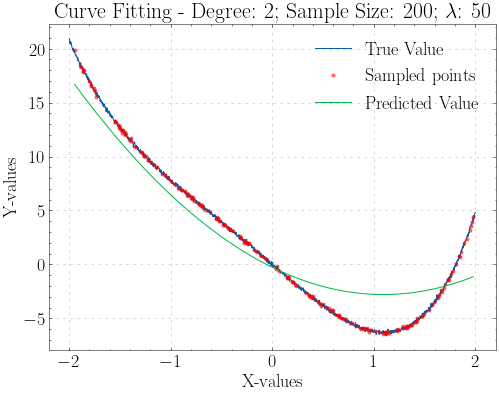

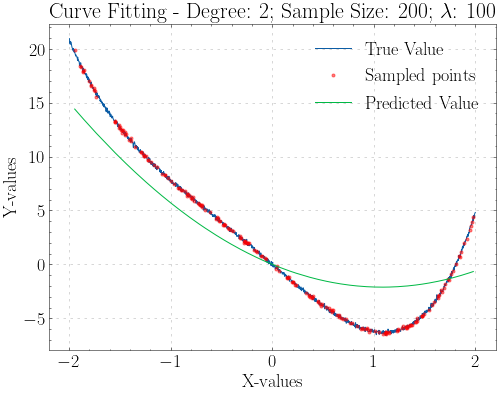

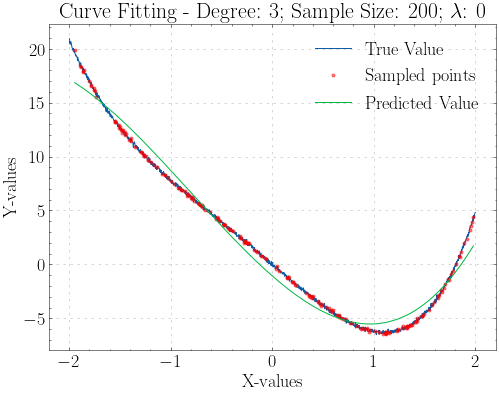

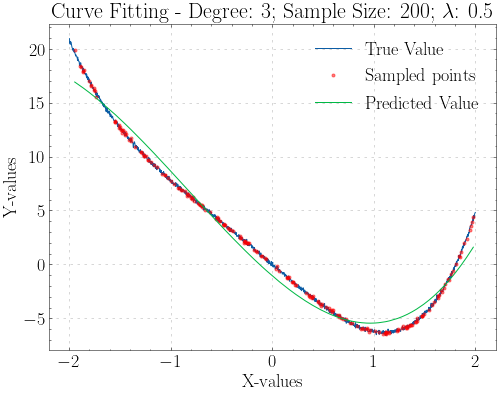

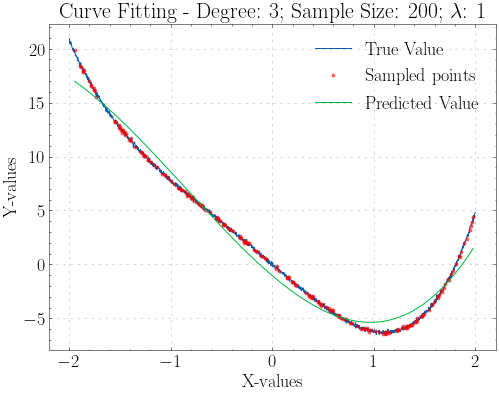

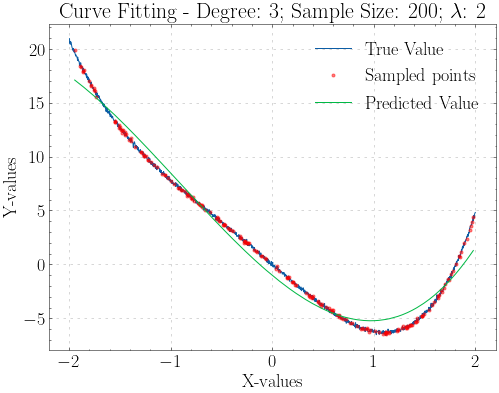

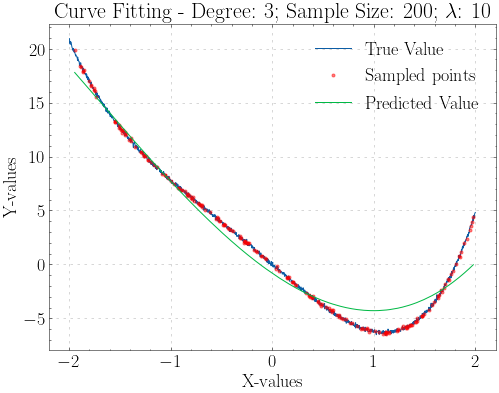

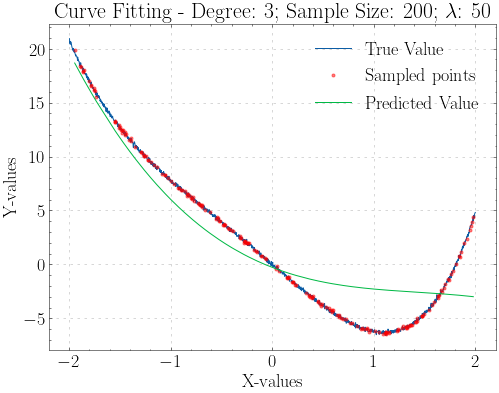

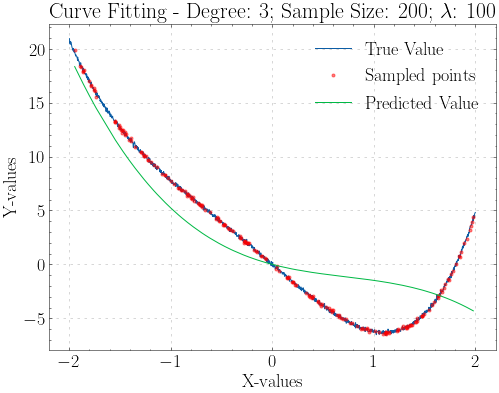

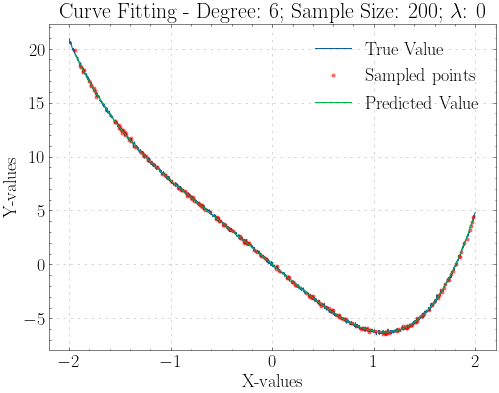

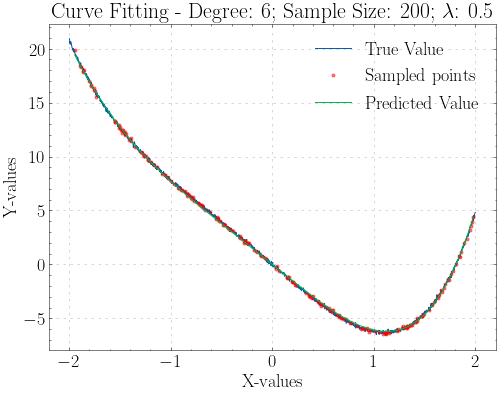

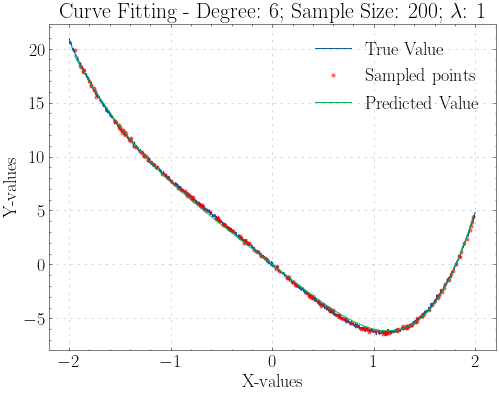

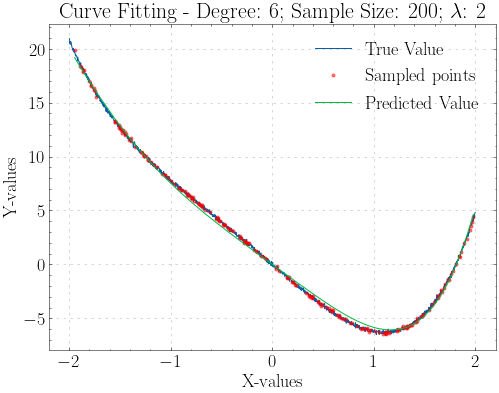

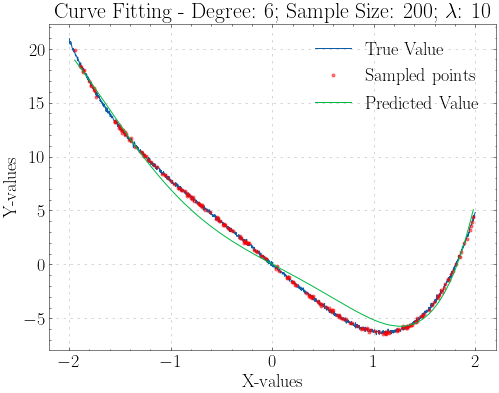

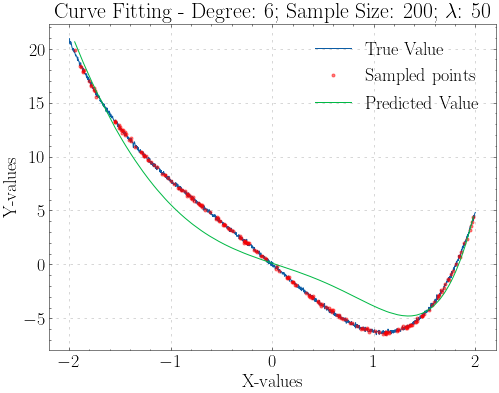

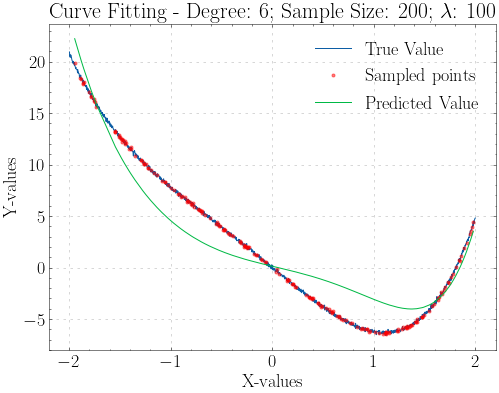

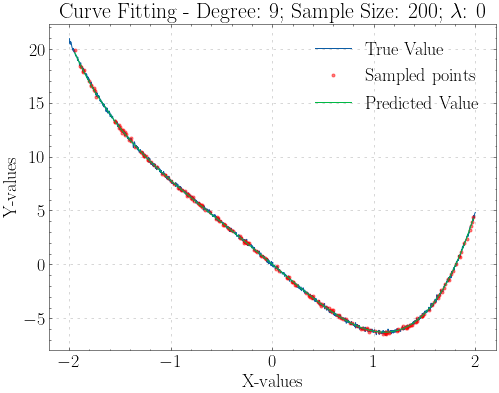

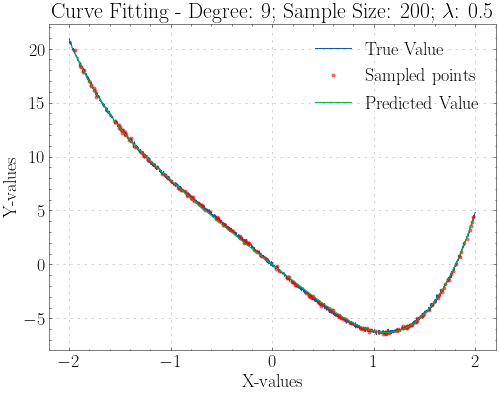

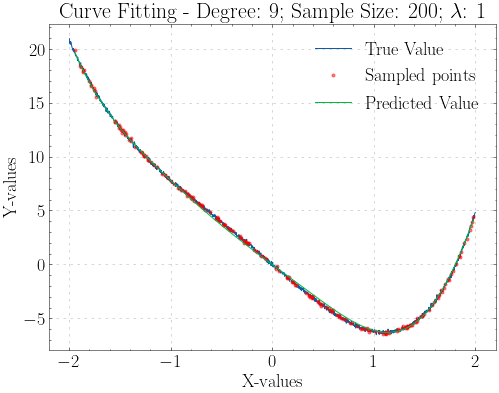

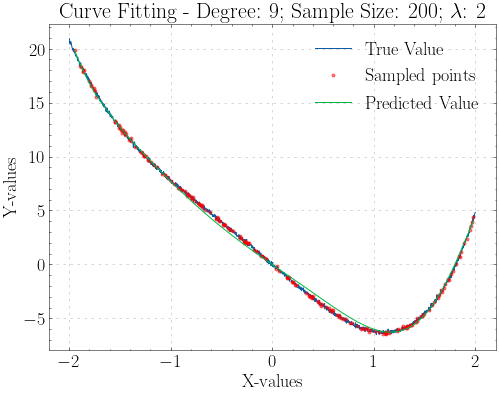

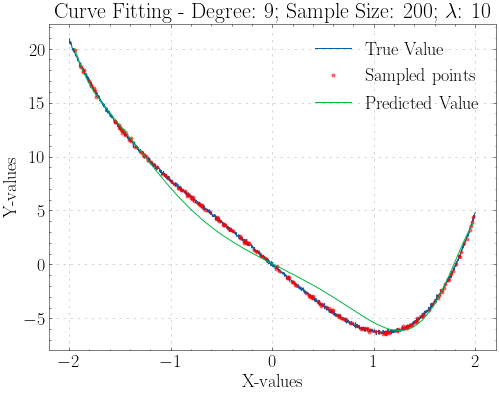

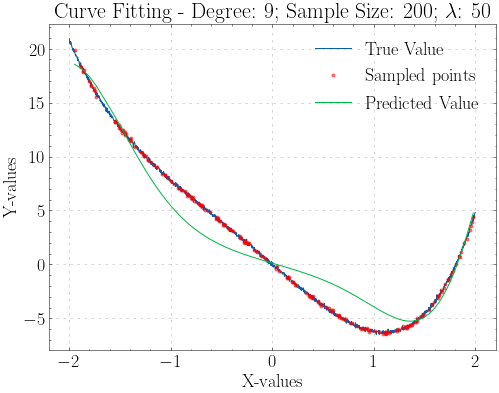

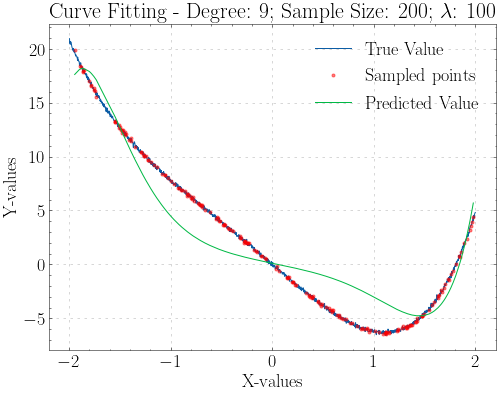

In [4]:
lmbda_list = [0, 0.5, 1, 2, 10, 50, 100]
degrees_allowed = [2, 3, 6, 9]
datasizes_considered = [10, 200]
complete_dataset_size = df.shape[0]

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

results_df_list = []
correspondance_list = []
for sample_size in datasizes_considered:
    gridsearch = GridSearch()
    df_result, correspondance = gridsearch.get_result(df, sample_size=sample_size, degrees_allowed=degrees_allowed, lmbda_list=lmbda_list)
    results_df_list.append(df_result)
    correspondance_list.append(correspondance)

    print("\nFor Sample Size of ", sample_size, " - GridSearch Results:")
    display(df_result)
    print("="*70)
    gridsearch.get_plots(X, y, correspondance, sample_size, show=True)

In [5]:
###################################################################

# From the resuts obtained, we see that degree=6, lambda=0.0 
# best fits the model.

###################################################################

best_degree = int(df_result.iloc[0]["degree"])
best_lmbda = df_result.iloc[0]["lambda"]

df_train = df.sample(frac=0.7, random_state=42)
df_test = df[~df.index.isin(df_train.index)]

X_train = df_train["x"].to_numpy().reshape(-1,1)
X_test = df_test["x"].to_numpy().reshape(-1,1)
y_train = df_train["y"].to_numpy().reshape(-1,1)
y_test = df_test["y"].to_numpy().reshape(-1,1)

regressor = PolynomialRegression()
X_train_poly = regressor.fit(X_train, y_train, degree=best_degree, lmbda=best_lmbda)
y_train_pred = regressor.transform(X_train)
y_test_pred = regressor.transform(X_test)
train_error = regressor.error(y_train, y_train_pred)
test_error = regressor.error(y_test, y_test_pred)

print("Training Error:", train_error)
print("Testing Error:", test_error)

Training Error: 0.09974659089780814
Testing Error: 0.09793071099285168
